In [220]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
import numpy as np
from sklearn.metrics import silhouette_score, silhouette_samples

%matplotlib inline 
plt.rcParams['figure.figsize'] = [10.0, 6.0] # Plot size 조정
matplotlib.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지


In [164]:
boarding_pop_by_subway = pd.read_csv('./data/boarding_pop_by_subway.csv', encoding='utf-8', header=0)
no_data = pd.read_csv('./data/no_data.csv', encoding='utf-8', header=0)
out_of_seoul_stations = pd.read_csv('./data/out_of_seoul_stations.csv', encoding='utf-8', header=0)
skt_floating_pop = pd.read_csv('./data/skt_floating_pop.csv', encoding='utf-8', header=0)
subway = pd.read_csv('./data/subway.csv', encoding='utf-8', header=0)

#objects = pd.read_csv('./data/objects.csv', encoding='utf-8', header=None, names=['ID', '20남', '30남', '40남', '50남', '6-70남', '20여', '30여', '40여', '50여', '6-70여']) # 인구수만 사용

objects = pd.read_csv('./data/clustering_parameters.csv', encoding='utf-8'); # 비율, 총인원 혼합사용. 20남,30남,40남,50남,6-70남,20여,30여,40여,50여,6-70여,총인원
print(objects.shape)

(1480, 11)


In [180]:
# inout_pop 이상치 제거
inout_pop = pd.read_csv('data/seoul_boarding_pop_by_subway.csv', encoding='utf-8')
inout_pop = inout_pop.drop('datetime', axis=1)

drop_index = list()

for stn in range(len(inout_pop)):
    total_pop_test = sum(inout_pop.iloc[stn, 2:50])
    if total_pop_test < 10000:
        drop_index += [stn]
print(drop_index)
inout_pop = inout_pop.drop(drop_index, axis=0)
inout_pop['station']

[90, 191, 196, 317, 323, 351]


0      동대문
1      동묘앞
2      서울역
3       시청
4      신설동
      ... 
371     망우
372     상봉
373     양원
374     중랑
375     회기
Name: station, Length: 370, dtype: object

In [162]:
# [datetime, line, station, 04시-05시 승차인원, 04-05시 하차인원, ... 작업일자,ID,gu]
df = objects;
# df = df.drop(labels=['ID'], axis='columns');

df_male = df['20남']+df['30남']+df['40남']+df['50남']+df['6-70남'];
df_total = df['총인원'];

df_data = pd.DataFrame({'male' : df_male, 'total' : df_total});
df_data

,male,total
0,0.517684,96219.5
1,0.517612,159446.0
2,0.516625,111656.5
3,0.502752,51192.5
4,0.520057,48756.0
...,...,...
1475,0.484616,20504.5
1476,0.488303,215938.5
1477,0.486811,235599.0
1478,0.490615,222342.0


In [222]:
object_list = [];
for s in inout_pop['station']:
    object_list.append(s+' 아침');
    object_list.append(s+' 낮');
    object_list.append(s+' 저녁');
    object_list.append(s+' 밤');
object_list

['동대문 아침',
 '동대문 낮',
 '동대문 저녁',
 '동대문 밤',
 '동묘앞 아침',
 '동묘앞 낮',
 '동묘앞 저녁',
 '동묘앞 밤',
 '서울역 아침',
 '서울역 낮',
 '서울역 저녁',
 '서울역 밤',
 '시청 아침',
 '시청 낮',
 '시청 저녁',
 '시청 밤',
 '신설동 아침',
 '신설동 낮',
 '신설동 저녁',
 '신설동 밤',
 '제기동 아침',
 '제기동 낮',
 '제기동 저녁',
 '제기동 밤',
 '종각 아침',
 '종각 낮',
 '종각 저녁',
 '종각 밤',
 '종로3가 아침',
 '종로3가 낮',
 '종로3가 저녁',
 '종로3가 밤',
 '종로5가 아침',
 '종로5가 낮',
 '종로5가 저녁',
 '종로5가 밤',
 '청량리 아침',
 '청량리 낮',
 '청량리 저녁',
 '청량리 밤',
 '강남 아침',
 '강남 낮',
 '강남 저녁',
 '강남 밤',
 '강변 아침',
 '강변 낮',
 '강변 저녁',
 '강변 밤',
 '건대입구 아침',
 '건대입구 낮',
 '건대입구 저녁',
 '건대입구 밤',
 '교대 아침',
 '교대 낮',
 '교대 저녁',
 '교대 밤',
 '구로디지털단지 아침',
 '구로디지털단지 낮',
 '구로디지털단지 저녁',
 '구로디지털단지 밤',
 '구의 아침',
 '구의 낮',
 '구의 저녁',
 '구의 밤',
 '낙성대 아침',
 '낙성대 낮',
 '낙성대 저녁',
 '낙성대 밤',
 '당산 아침',
 '당산 낮',
 '당산 저녁',
 '당산 밤',
 '대림 아침',
 '대림 낮',
 '대림 저녁',
 '대림 밤',
 '도림천 아침',
 '도림천 낮',
 '도림천 저녁',
 '도림천 밤',
 '동대문역사문화공원 아침',
 '동대문역사문화공원 낮',
 '동대문역사문화공원 저녁',
 '동대문역사문화공원 밤',
 '뚝섬 아침',
 '뚝섬 낮',
 '뚝섬 저녁',
 '뚝섬 밤',
 '문래 아침',
 '문래 낮',
 '문래 저녁',
 '문래 밤',
 '방배 아침',
 '방배 낮',
 '방

[[4.87984988e-01 1.82225090e+05]
 [4.84165874e-01 5.71068253e+04]
 [4.89411469e-01 4.29791744e+05]]
KMeans(n_clusters=3, random_state=0)


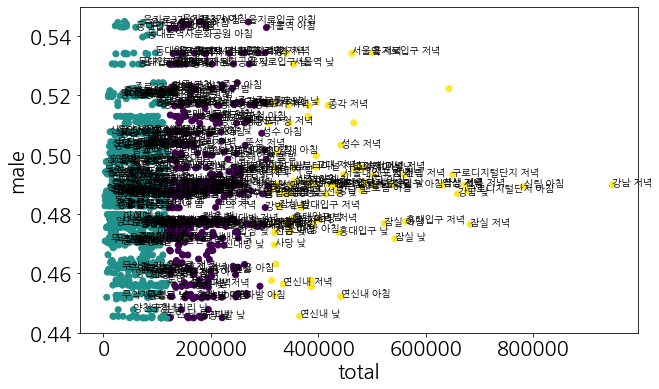

In [223]:
k_group = [3] # Choose k range

for k in k_group:
    km = KMeans(n_clusters = k, random_state = 0); # Initial value => random_state attr.
    km.fit(df_data); # Commit clustering
    result = km.predict(df_data);
    
    # TODO : normalization
    """
    유동인구 중 최대치로 모두를 나누기 ... 작은 숫자가 너무 작을 수 있음
    """
    
    print(km.cluster_centers_); # Print center
    # result[15] # Find cluster where the item belongs
    print(km)
    plt.scatter(df_data['total'], df_data['male'], c = result); # 점 plot 실행
    plt.xlabel('total');
    plt.ylabel('male');

    # 20-30대 승하차인원 vs 60-70대 승하차인원
    # 시간대 합침

    plt.rc('font', family='NanumGothic')
    plt.rc('font', size='10')
    for i in range(len(inout_pop)):
        plt.annotate('%s' % object_list[i], (df_data['total'][i], df_data['male'][i]))

    
    plt.show();

DBSCAN(eps=30000)


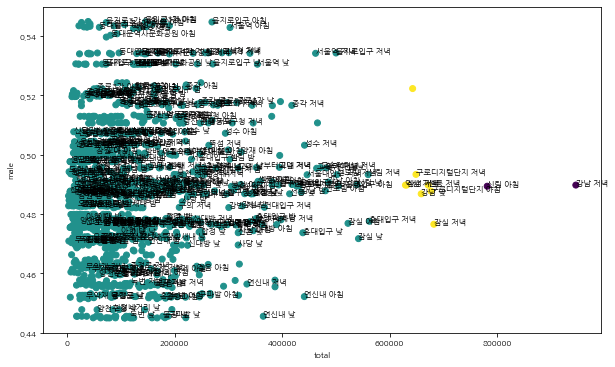

          label  cluster     total      male
41         강남 낮        1  658822.5  0.486812
56   구로디지털단지 아침        1  677010.0  0.487708
58   구로디지털단지 저녁        1  649101.5  0.493359
106       삼성 저녁        1  632057.5  0.489785
122       선릉 저녁        1  671781.5  0.489735
174       역삼 저녁        1  629575.5  0.489749
210       잠실 저녁        1  682365.0  0.476557
826  가산디지털단지 저녁        1  642870.0  0.522298


In [225]:
# DBSCAN

k_group = [3] # Choose k range

for k in k_group:
    ds = DBSCAN(eps=30000).fit(df_data);
    print(ds)
    plt.scatter(df_data['total'], df_data['male'], c=ds.labels_);
    plt.xlabel('total');
    plt.ylabel('male');
    plt.rc('font', size='8')
    for i in range(len(inout_pop)):
        plt.annotate('%s' % object_list[i], (df_data['total'][i], df_data['male'][i]))
    
    plt.show();
a = pd.DataFrame({'label':object_list, 'cluster':ds.labels_, 'total':df_data['total'], 'male':df_data['male']});
print(a[a['cluster'] == 1])

In [201]:
print(len(object_list));
print(df_data.shape)

1480
(1480, 2)


PCA(n_components=2)
[0.6539005  0.18866453]
[[ 0.055595   -0.43396356 -0.35391773 -0.06568485  0.32761275 -0.19832562
  -0.28203956  0.06279012  0.2786676   0.60926584]
 [ 0.53004104 -0.07004847 -0.34197961 -0.41143503 -0.13519669  0.59204016
   0.07479237 -0.09832696 -0.2004902   0.06060339]]


,20남,30남,40남,50남,6-70남,20여,30여,40여,50여,6-70여
0,0.084346,0.109687,0.118614,0.108097,0.096940,0.095445,0.092585,0.096034,0.091298,0.106954
1,0.078076,0.115499,0.121612,0.106386,0.096039,0.099559,0.102443,0.097990,0.089632,0.092764
2,0.093400,0.114311,0.116277,0.102721,0.089916,0.111701,0.097666,0.093950,0.086836,0.093221
3,0.106137,0.101975,0.101291,0.096518,0.096830,0.110825,0.086980,0.092930,0.091539,0.114974
4,0.082899,0.111753,0.120837,0.108905,0.095663,0.094964,0.094083,0.096291,0.090433,0.104172
...,...,...,...,...,...,...,...,...,...,...
1475,0.081408,0.096055,0.096391,0.102579,0.108183,0.081795,0.092430,0.099016,0.111009,0.131134
1476,0.105151,0.091747,0.092119,0.091117,0.108167,0.100703,0.088410,0.091459,0.097746,0.133379
1477,0.102674,0.086874,0.090480,0.092471,0.114312,0.096767,0.084797,0.091958,0.099483,0.140184
1478,0.101738,0.089209,0.092658,0.093686,0.113323,0.095502,0.085722,0.091835,0.099382,0.136944


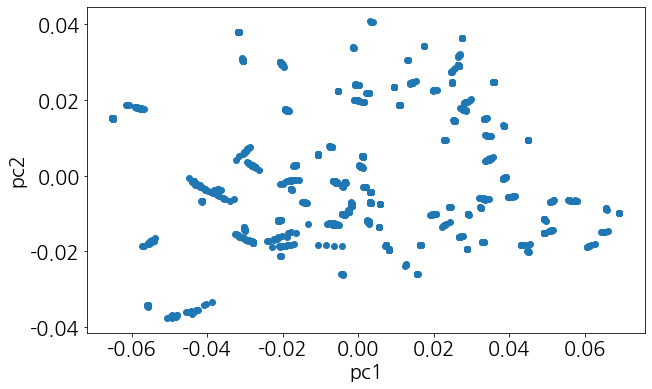

In [227]:
# PCA, n=2
n = 2;
pca = PCA(n_components=n);

# df = objects.drop(labels=['ID'], axis='columns'); # raw data
df = objects.drop(labels=['총인원'], axis='columns'); # 비율, 총인구 사용 data

pc = pca.fit_transform(df);
df_pc = pd.DataFrame(data=pc, columns = ['pc1', 'pc2']);
print(pca);
print(pca.explained_variance_ratio_);
plt.scatter(df_pc['pc1'], df_pc['pc2']);
plt.xlabel('pc1');
plt.ylabel('pc2');
plt.rc('font', size='20');

print(pca.components_)
df

PCA(n_components=10)
[6.53900499e-01 1.88664527e-01 7.62863115e-02 4.27445353e-02
 2.48394515e-02 7.45494941e-03 3.76615184e-03 1.44791746e-03
 8.95657050e-04 2.94542965e-30]


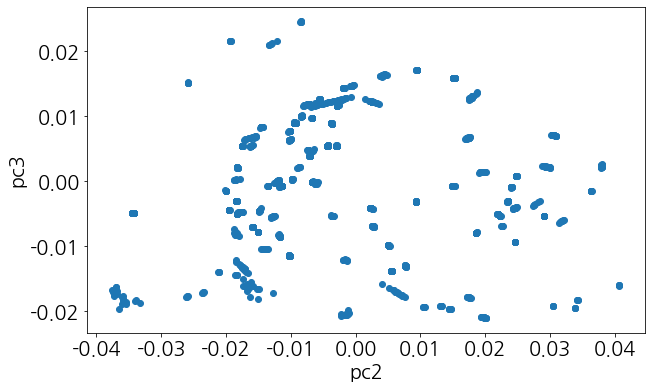

[[ 0.055595   -0.43396356 -0.35391773 -0.06568485  0.32761275 -0.19832562
  -0.28203956  0.06279012  0.2786676   0.60926584]
 [ 0.53004104 -0.07004847 -0.34197961 -0.41143503 -0.13519669  0.59204016
   0.07479237 -0.09832696 -0.2004902   0.06060339]
 [-0.26550685 -0.18047048 -0.1159933  -0.37231009 -0.25722346 -0.05857437
   0.44961202  0.66960165  0.15541094 -0.02454605]
 [ 0.36240352 -0.42445447  0.12024731  0.3188099  -0.19392952  0.08966031
  -0.42139535  0.3890876   0.17037869 -0.41080798]
 [ 0.30148459  0.27312798 -0.48031012  0.0548769  -0.06989504 -0.33042299
   0.20436753 -0.19293121  0.55517694 -0.31547459]
 [-0.50163248 -0.24304927 -0.22537655  0.19207082  0.26927021  0.56929956
   0.09867234 -0.18837984  0.29683051 -0.2677053 ]
 [-0.22138144  0.26459587  0.0385345   0.02799669 -0.66374805  0.23937384
  -0.33268877 -0.07888719  0.37445371  0.35175086]
 [-0.11120738  0.47539656 -0.06908505 -0.41533089  0.38393721  0.08387318
  -0.52057617  0.31863367  0.08012291 -0.22576404]


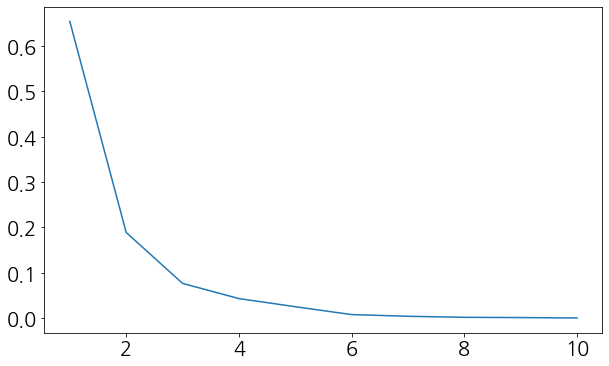

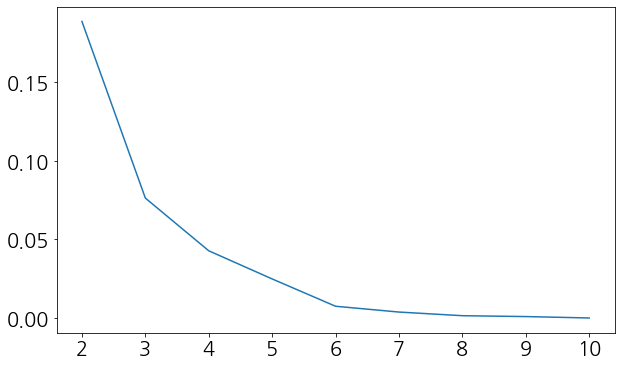

In [228]:
# PCA, n=10
n = 10;
pca = PCA(n_components=n);

# df = objects.drop(labels=['ID'], axis='columns');

pc = pca.fit_transform(df);
df_pc = pd.DataFrame(data=pc, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8' ,' pc9' ,'pc10']);
print(pca);
print(pca.explained_variance_ratio_);
plt.rc('font', size='20');
plt.scatter(df_pc['pc2'], df_pc['pc3']);
plt.xlabel('pc2');
plt.ylabel('pc3');
plt.show();
print(pca.components_)
df
plt.plot([i+1 for i in range(10)], pca.explained_variance_ratio_);
plt.show();
plt.plot([i+2 for i in range(9)], pca.explained_variance_ratio_[1:]);
plt.show();

2 th silhouette score: 0.375361


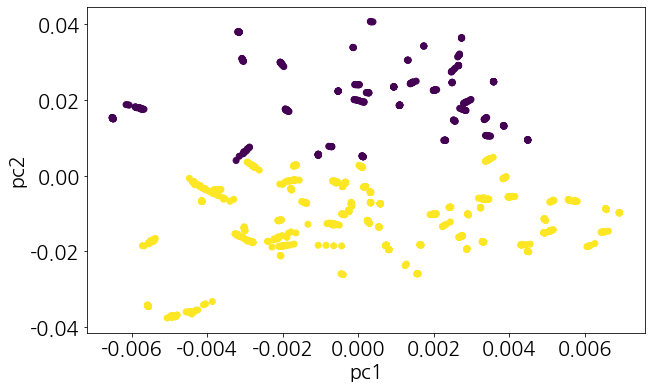

3 th silhouette score: 0.297925


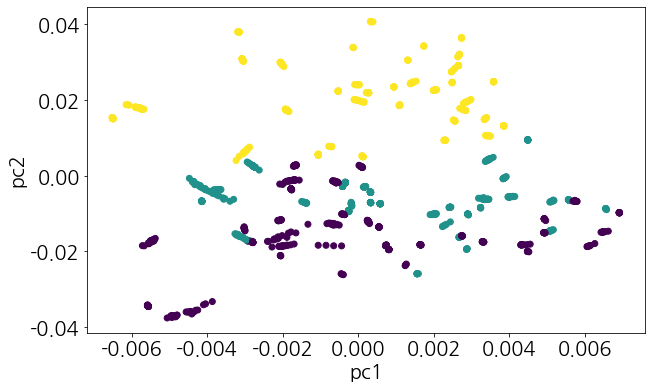

4 th silhouette score: 0.307154


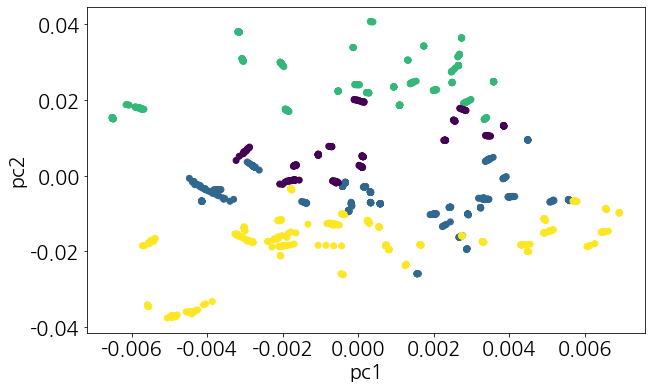

5 th silhouette score: 0.327157


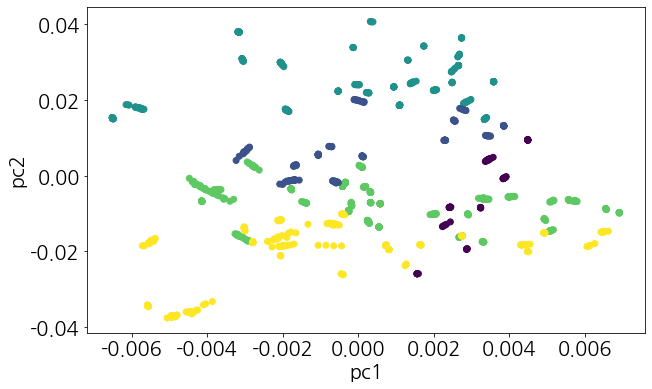

6 th silhouette score: 0.308750


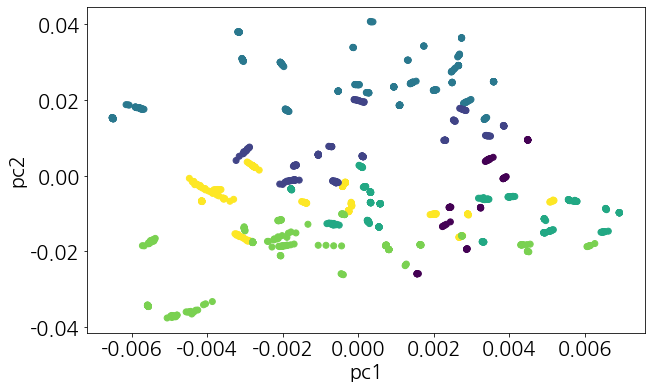

7 th silhouette score: 0.332363


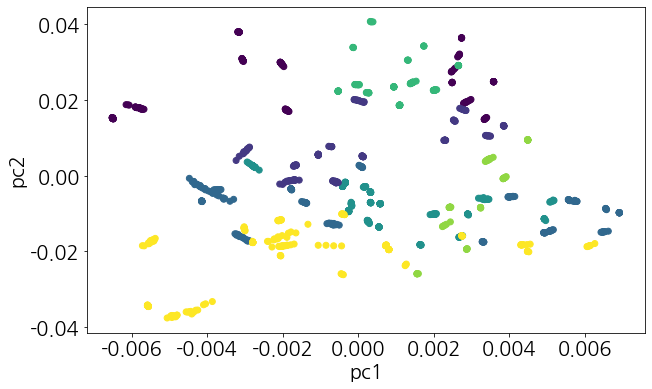

8 th silhouette score: 0.335997


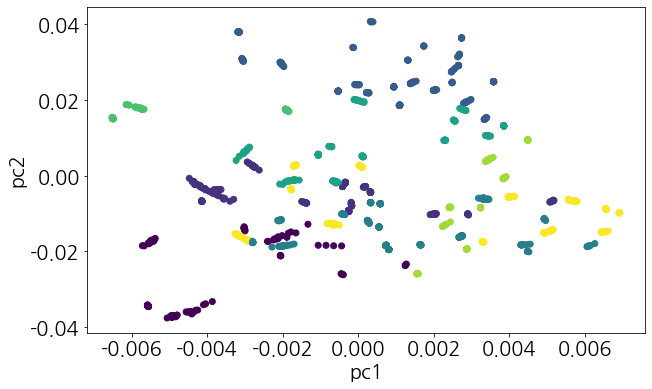

9 th silhouette score: 0.341528


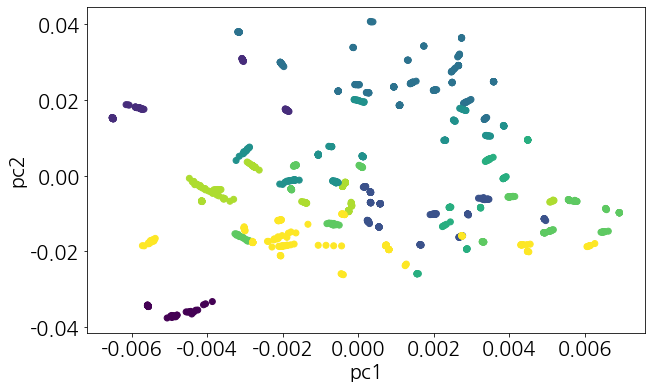

10 th silhouette score: 0.363874


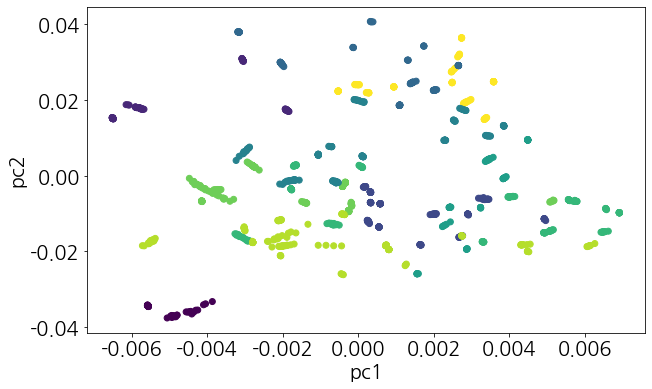

11 th silhouette score: 0.371566


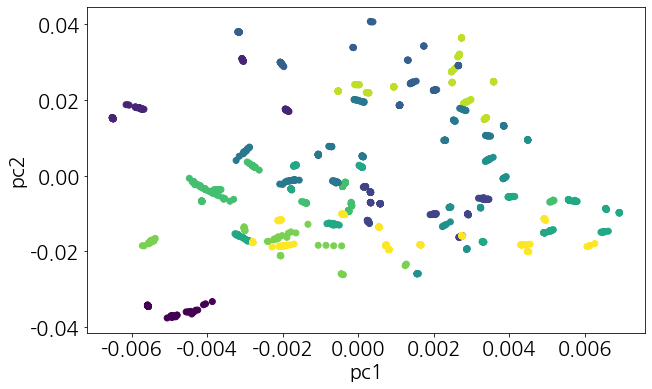

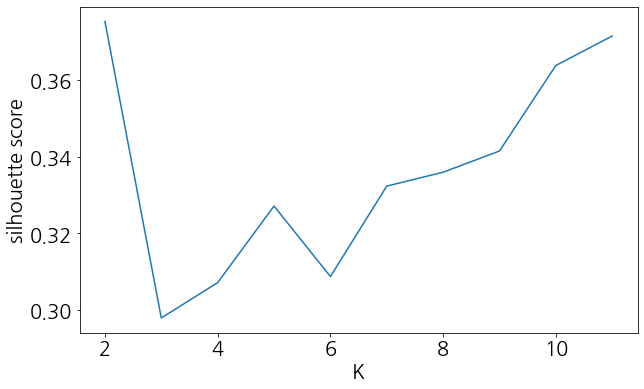

In [229]:
# KMeans to PCA
k_group = [i+2 for i in range(10)] # Choose k range
df_pc_kmeans = df_pc.copy();
df_pc_kmeans['pc1'] = df_pc_kmeans['pc1']/10;
silhouette_group = [];
for k in k_group:
    km = KMeans(n_clusters = k, random_state = 0); # Initial value => random_state attr.
    km.fit(df_pc_kmeans); # Commit clustering
    result = km.predict(df_pc_kmeans);
    
    # print(km.cluster_centers_); # Print center
    sil_score = silhouette_score(df_pc_kmeans, result.T, metric='euclidean');
    silhouette_group.append(sil_score);
    print('%d th silhouette score: %f' %(k, sil_score));
    
    plt.scatter(df_pc_kmeans['pc1'], df_pc_kmeans['pc2'], c = result); # 점 plot 실행
    plt.xlabel('pc1');
    plt.ylabel('pc2');
    plt.rc('font', family='NanumGothic');
    plt.rc('font', size='20');
        
    plt.show();

#    xy = make_n_dim_norm_array(dim=5, sample_size=500, mu1=1, mu2 = 2+i*5)
#    cluster_nums = AgglomerativeClustering(n_clusters=2).fit_predict(xy)
plt.plot(k_group, silhouette_group);
plt.xlabel('K');
plt.ylabel('silhouette score');